<a href="https://colab.research.google.com/github/rodrigoldiniz/Scripts_Python/blob/master/CS_Visualizacao_Informacao_Python_Analise_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as p

In [0]:
aqrv = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df = pd.read_csv(aqrv, encoding="utf-8") #parse_dates=['dateRep'], infer_datetime_format=True,

In [4]:
df['dateRep'] = pd.to_datetime(df['dateRep'], format="%d/%m/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21756 entries, 0 to 21755
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  21756 non-null  datetime64[ns]
 1   day                      21756 non-null  int64         
 2   month                    21756 non-null  int64         
 3   year                     21756 non-null  int64         
 4   cases                    21756 non-null  int64         
 5   deaths                   21756 non-null  int64         
 6   countriesAndTerritories  21756 non-null  object        
 7   geoId                    21672 non-null  object        
 8   countryterritoryCode     21448 non-null  object        
 9   popData2018              21435 non-null  float64       
 10  continentExp             21756 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 1.8+ MB


In [5]:
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-06,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-06-05,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-06-04,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-06-03,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-31,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-30,30,5,2020,623,11,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-29,29,5,2020,580,8,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-28,28,5,2020,625,7,Afghanistan,AF,AFG,37172386.0,Asia


In [6]:
df.dateRep.describe()

count                   21756
unique                    159
top       2020-06-02 00:00:00
freq                      209
first     2019-12-31 00:00:00
last      2020-06-06 00:00:00
Name: dateRep, dtype: object

In [7]:
pie = df.groupby('continentExp')['cases', 'deaths'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [8]:
pie.head()

,continentExp,cases,deaths
0,Africa,177209,4913
1,America,3206492,178273
2,Asia,1277558,33481
3,Europe,2035331,177908
4,Oceania,8716,131


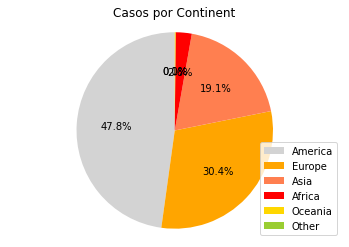

In [9]:
labels = pie.sort_values(by=["cases"], ascending=False)["continentExp"]
casos = pie.sort_values(by=["cases"], ascending=False)["cases"]
colors = [ 'lightgray', 'orange', 'coral', 'red','gold', 'yellowgreen', 'lightblue']

patches, texts, autotexts = plt.pie(casos, colors=colors, autopct='%1.1f%%',
startangle=90)
plt.legend(patches, labels, loc="lower right")
plt.title('Casos por Continent')
plt.axis('equal')
plt.show()


In [10]:
line = df.groupby('dateRep')['cases', 'deaths'].sum().reset_index()
line.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,dateRep,cases,deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0


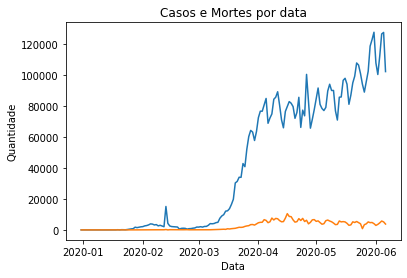

In [11]:
data = line.sort_values(by=["dateRep"], ascending=False)["dateRep"]
casos = line.sort_values(by=["dateRep"], ascending=False)["cases"]
mortes = line.sort_values(by=["dateRep"], ascending=False)["deaths"]

plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.title('Casos e Mortes por data')
plt.plot(data, casos)
plt.plot(data, mortes)

In [12]:
df_agrupado = df.groupby(['dateRep', 'countryterritoryCode'])['cases', 'deaths'].sum().reset_index()
world = df.groupby('countryterritoryCode')['cases', 'deaths'].sum().reset_index()
world = world.sort_values(by=["cases"], ascending=False)
world.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,countryterritoryCode,cases,deaths
192,USA,1897838,109143
25,BRA,614941,34021
157,RUS,449834,5528
65,GBR,283311,40261
57,ESP,240978,27134


In [13]:
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21448 entries, 0 to 21447
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   dateRep               21448 non-null  datetime64[ns]
 1   countryterritoryCode  21448 non-null  object        
 2   cases                 21448 non-null  int64         
 3   deaths                21448 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 670.4+ KB


In [15]:
fig = go.Figure(data=go.Choropleth(
 locations=world['countryterritoryCode'], # Nome do país
 z = world['cases'].astype(int), # Dados para o Choropleth
 locationmode = 'ISO-3', # Tipo de identificção geográfica
 colorscale = 'Reds', #escala contínua em tons de vermelho
 colorbar_title = "Casos",
))
fig.update_layout(
 title_text = 'Casos de Covid no Mundo',
)
fig.show()

fig = go.Figure(data=go.Choropleth(
 locations=world['countryterritoryCode'], # Nome do país
 z = world['deaths'].astype(int), # Dados para o Choropleth
 locationmode = 'ISO-3', # Tipo de identificção geográfica
 colorscale = 'Reds', #escala contínua em tons de vermelho
 colorbar_title = "Mortes",
))
fig.update_layout(
 title_text = 'Mortes por Covid no Mundo',
)
fig.show()

fig = p.choropleth(df_agrupado,                                          # casos agrupados por país
                    locations='countryterritoryCode',                             # definindo as regiões no mapa
                    locationmode='ISO-3',# define o modo de localização para todas regiões
                    color=np.log(df_agrupado["cases"]),# define a cor pelo o valor de casos confirmados (aplica o log)
                    hover_name='countryterritoryCode',   # define o texto interativo com o nome da região
                    hover_data=["cases", "deaths"], # define o texto interativo com o numero de casos confirmasos e mortes
                    animation_frame=df_agrupado["dateRep"].dt.strftime('%d-%m-%Y'),   # define o animate_frame com as datas
                    title='Casos ao longo do tempo',         # define título
                    color_continuous_scale=p.colors.sequential.Magenta)    # define a paleta de cores
fig.update_layout(autosize=False, width=1200, height=800)  # define tamanho da figura
fig.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning:

invalid value encountered in log



In [16]:
pais = df.groupby(['countriesAndTerritories', 'continentExp'])['cases', 'deaths'].sum().reset_index()
pais = pais.sort_values(by=["cases"], ascending=False)
pais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 201 to 5
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   countriesAndTerritories  210 non-null    object
 1   continentExp             210 non-null    object
 2   cases                    210 non-null    int64 
 3   deaths                   210 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.2+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [17]:
!pip install plotly==4.5.2

In [18]:
fig = p.treemap(pais,path=(['continentExp', 'countriesAndTerritories']),values='cases', title='Número de Casos Confirmadas',
                 color_discrete_sequence = p.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

fig = p.treemap(pais,path=(['continentExp', 'countriesAndTerritories']),values='deaths', title='Número de Mortes Confirmadas',
                 color_discrete_sequence = p.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()
